In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from src.oracle import Oracle
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = True

In [11]:
WINDOW = 3600 # 1 hrs # NOTE this is way longer than the actual contract
PERIOD = 86400 # 1 day

def gen_gbm(S0,mu,sigma, dt, T):
    W = np.random.normal(loc=0, scale=np.sqrt(dt), size=int(T / dt))
    S = S0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) * dt + sigma * W))
    return(S)

In [14]:
# Test oracle with price updates every minute
oracle = Oracle(WINDOW)

start = int(datetime.now().timestamp())
times = [int(start + dt*60) for dt in range(0, PERIOD//60)]

df = pd.DataFrame()
df['timestamp'] = times
df['spot'] = gen_gbm(S0=1800,mu=0.05, sigma=0.2, dt=1/1440,T=1)
df['oracle'] = df.apply(lambda row: oracle.update(row['timestamp'], row['spot']), axis=1)
df.index = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,timestamp,spot,oracle
timestamp,,,
2023-10-16 01:25:28,1697419528,1796.485129,1796.485129
2023-10-16 01:26:28,1697419588,1797.939405,1796.509167
2023-10-16 01:27:28,1697419648,1812.974743,1796.781319
2023-10-16 01:28:28,1697419708,1805.544377,1796.926159
2023-10-16 01:29:28,1697419768,1809.278569,1797.130327


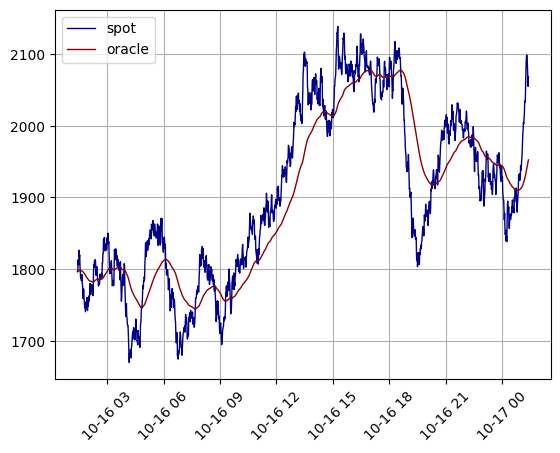

In [15]:
f, ax = plt.subplots()

ax.plot(df.index, df['spot'], label='spot', c='darkblue', lw=1)
ax.plot(df.index, df['oracle'], label='oracle', c='darkred', lw=1)
ax.legend()
ax.tick_params(axis='x', rotation=45)